In [315]:
import pandas as pd  # For loading and manipulating data
import matplotlib.pyplot as plt  # For creating basic plots
import seaborn as sns  # For creating more attractive statistical plots
import numpy as np # For calculation

# This line makes your plots appear directly in the notebook
%matplotlib inline

In [316]:
# Load your dataset into a pandas DataFrame
df = pd.read_csv('Cars Datasets by Ayusman Pati 498_2025.csv')

In [317]:
df.head() # Shows the first 5 rows

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance (0 - 100) KM/H,Cars Prices,Fuel Types,Seats,Torque,Manufacturing Date
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$11,00,000",Plug-in Hybrid,2,800 Nm,29-04-2019
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$4,60,000",Petrol,5,900 Nm,19-04-2021
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$13,500",Petrol,5,100 - 140 Nm,20-12-2017
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$1,61,000",Petrol,4,900 Nm,15-10-2018
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$2,53,290",Petrol,2,560 Nm,28-09-2022


In [318]:
# It tells you the column names, how many non-null values are in each, and their data types (like number, text, or date).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Company Names               497 non-null    object
 1   Cars Names                  497 non-null    object
 2   Engines                     497 non-null    object
 3   CC/Battery Capacity         496 non-null    object
 4   HorsePower                  497 non-null    object
 5   Total Speed                 497 non-null    object
 6   Performance (0 - 100) KM/H  496 non-null    object
 7   Cars Prices                 497 non-null    object
 8   Fuel Types                  497 non-null    object
 9   Seats                       497 non-null    int64 
 10  Torque                      497 non-null    object
 11  Manufacturing Date          497 non-null    object
dtypes: int64(1), object(11)
memory usage: 46.7+ KB


In [319]:
# This command calculates the count, mean, standard deviation, min, max, and percentiles.
df.describe()

,Seats
count,497.000000
mean,4.806841
std,1.561544
min,2.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,20.000000


 What is the distribution of prices in my dataset? Are they spread out or clustered ?

In [320]:
# Used to remove currency symbols and commas, then convert the column to a numeric type
df['Cars Prices'] = pd.to_numeric(df['Cars Prices'].str.replace('$', '').str.replace(',', ''))

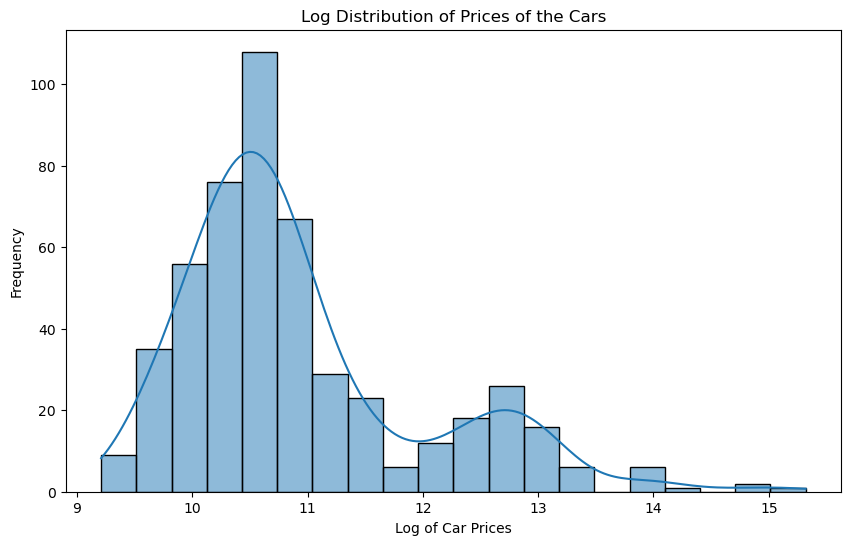

In [321]:
plt.figure(figsize=(10, 6)) # Sets the size of the plot
sns.histplot(np.log1p(df['Cars Prices']), kde=True, bins=20)
# This will transform the data to show the distribution properly
plt.title('Log Distribution of Prices of the Cars')
plt.xlabel('Log of Car Prices')
plt.ylabel('Frequency')
# plt.xticks(rotation=45, ha='right') # ha='right' aligns the labels nicely
# This line to rotate the labels
plt.show()

This histogram shows that most of the product prices are concentrated between log value of car prices - 10 and 11, with very few products priced above 13. The distribution of prices in my dataset is right-skewed and bimodal. the main cluster is actually made of two separate groups: A large group of lower-priced, mass-market cars , A smaller group of higher-priced, premium cars. The prices are actually both clustered and spread out.

What number of seats in a car appears most often in the data?

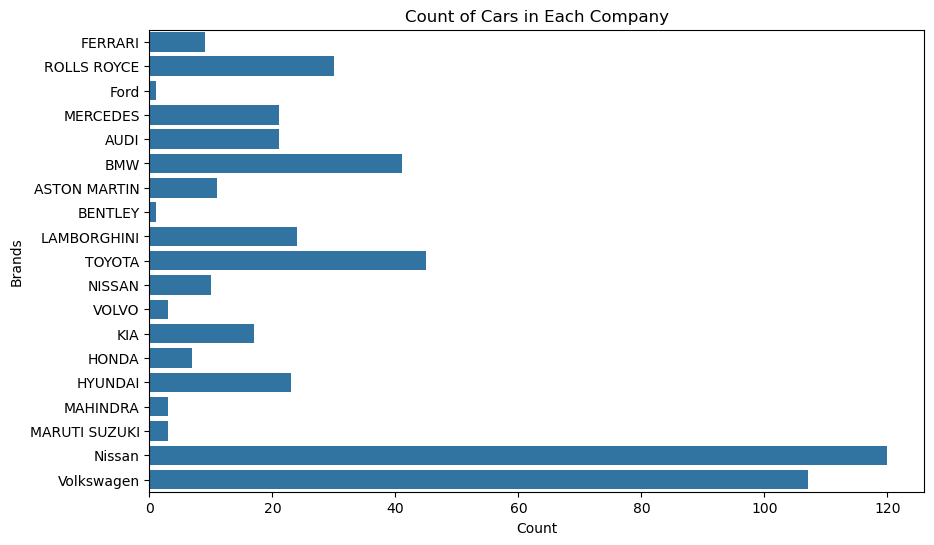

In [322]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Company Names']) # Using 'y' makes it a horizontal bar chart which is good for long labels
plt.title('Count of Cars in Each Company')
plt.xlabel('Count')
plt.ylabel('Brands')
plt.show()

The brand with maximum number of cars is Nissan followed by Volkswagen.

What is the relationship between Horsepower and Cars Prices in my data ?

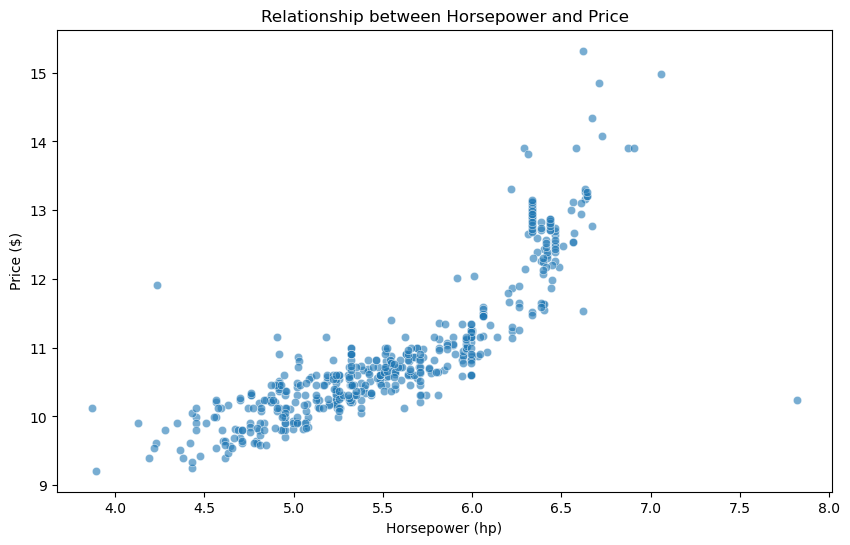

In [323]:
# We create a copy to make sure our cleaning steps don't affect other plots
df_scatter = df.copy()
df_scatter['HorsePower'] = (df_scatter['HorsePower'].astype(str)
                           .str.replace('hp|kwh|cc', '', case=False, regex=True)
                           .str.replace(',', '')
                           .str.strip())

df_scatter['HorsePower'] = df_scatter['HorsePower'].apply(lambda x: np.mean([float(val) for val in x.split('-')]) if '-' in x else float(x))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=np.log1p(df_scatter['HorsePower']), y=np.log1p(df_scatter['Cars Prices']), alpha=0.6)

plt.title('Relationship between Horsepower and Price')
plt.xlabel('Horsepower (hp)')
plt.ylabel('Price ($)')
plt.ticklabel_format(style='plain', axis='y') # Prevents scientific notation on y-axis
plt.show()

With increase in price, horsepower also increases exponentially.

How can I compare the price range, median price, and outliers for cars with different fuel types ?

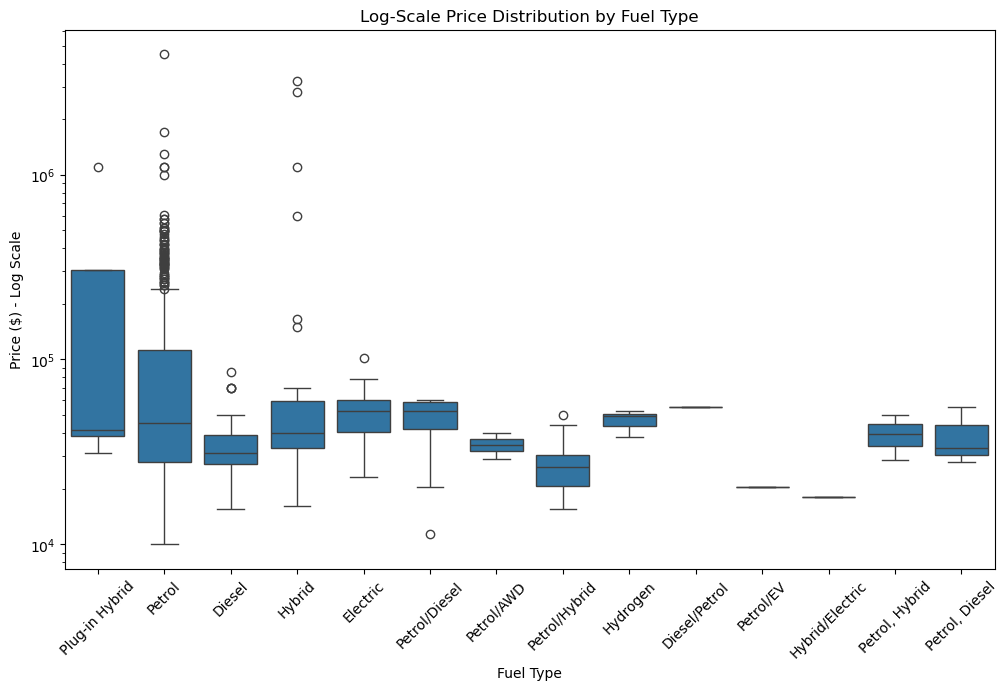

In [324]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Fuel Types', y='Cars Prices', data=df)
# Adding this line to change the y-axis to a log scale
plt.yscale('log')

plt.title('Log-Scale Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price ($) - Log Scale')
plt.xticks(rotation=45)
plt.show()

Higher Entry Cost for Newer Technologies: Electric, Plug-in Hybrid, and other alternative fuel cars show a significantly higher median price.

Which car features have the strongest relationship with the vehicle's price, and how do they relate to each other?

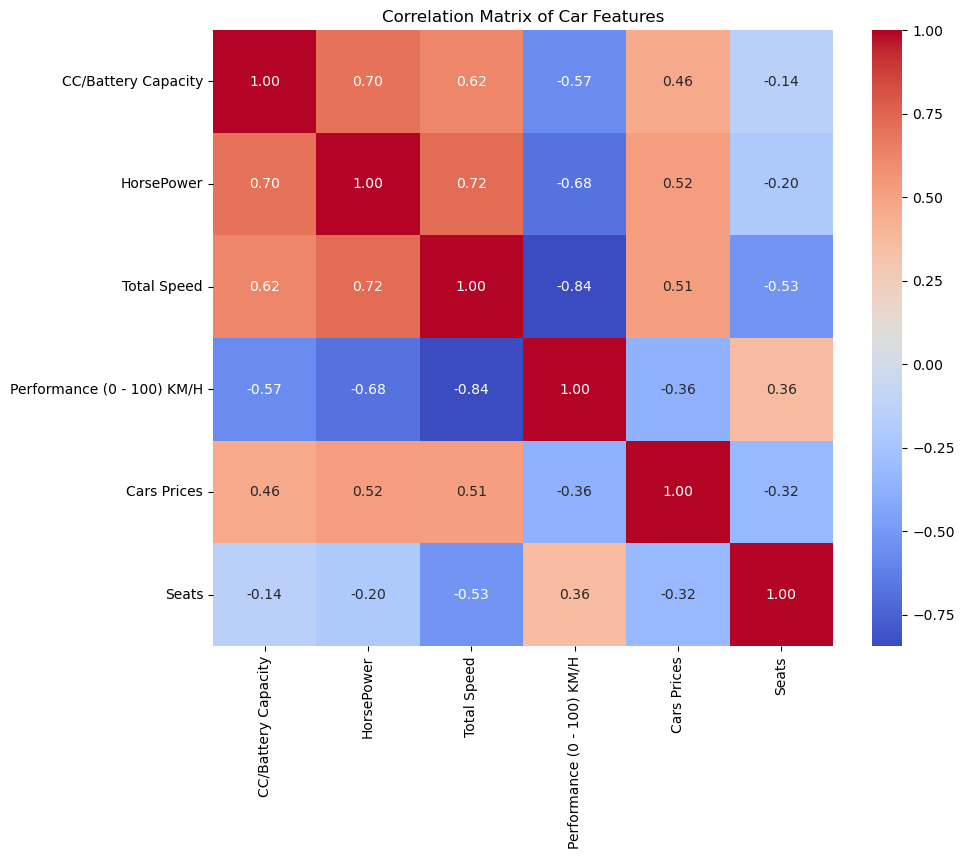

In [325]:
df_heat = df.copy()
# Defining the numerical columns wanted in the heatmap
numerical_cols = ['CC/Battery Capacity', 'HorsePower', 'Total Speed', 'Performance (0 - 100) KM/H', 'Cars Prices', 'Seats']

# Cleaning each column thoroughly
df_heat['CC/Battery Capacity'] = pd.to_numeric(df_heat['CC/Battery Capacity'].astype(str).str.replace(r' cc|,|kwh|kWh|KWH', '', case=False, regex=True), errors='coerce')

df_heat['HorsePower'] = (df_heat['HorsePower'].astype(str)
                           .str.replace('hp|kwh|cc', '', case=False, regex=True)
                           .str.replace(',', '')
                           .str.strip())
df_heat['HorsePower'] = df_heat['HorsePower'].apply(lambda x: 
    np.mean([float(val) for val in x.split('-')]) if '-' in x and x not in ['', None] else (float(x) if x not in ['', None] else np.nan))

df_heat['Total Speed'] = pd.to_numeric(df_heat['Total Speed'].astype(str).str.replace(' km/h', '', case=False), errors='coerce')
df_heat['Performance (0 - 100) KM/H'] = pd.to_numeric(df_heat['Performance (0 - 100) KM/H'].astype(str).str.replace(' sec', '', case=False), errors='coerce')

correlation_matrix = df_heat[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Car Features')
plt.show()

A car's price is most strongly dictated by its performance, specifically its power and acceleration.